In [254]:
import random
import numpy as np
import pandas as pd
from numpy.random import choice
import datetime
import pickle
import json

In [275]:
random.seed(4)
np.random.seed(4)

In [276]:
def get_random_with_weight(data):
    weigts = [i['weight'] for i in data]
    probs = [i / np.sum(weigts) for i in weigts]
    return data[choice(len(data), 1, p=probs)[0]]

In [376]:
f = open('word_rus.txt')
words = f.readlines()
words = [i.strip() for i in words]

In [386]:
words_subset = [words[random.randint(0, len(words) - 1)] for i in range(40)]


def get_random_russian_word():
    return words_subset[random.randint(0, len(words_subset) - 1)]

In [400]:
purchase_types = [
    {
        'name': 'Покупка в супермаркете',
        'min': 20,
        'max': 10000,
        'weight': 20,
    },
    {
        'name': 'АЗС',
        'min': 100,
        'max': 2000,
        'weight': 10,
    },
    {
        'name': 'Снятие наличных',
        'min': 500,
        'max': 15000,
        'weight': 50,
    },
    {
        'name': 'Покупка *',
        'min': 0,
        'max': 150000,
        'weight': 70,
    },
]

with open('purchase_types.pkl', 'wb') as handle:
    pickle.dump(purchase_types, handle, protocol=pickle.HIGHEST_PROTOCOL)

purchase_types = None
with open('purchase_types.pkl', 'rb') as handle:
    purchase_types = pickle.load(handle)

In [482]:
subscribtion_types = [
    {
        'id':
        0,
        'name':
        'Amediateka',
        'description':
        'Сервис для просмотра фильмов',
        'logo':
        'http://apps4all.ru/media/ru/blog/56782d125a5380.37100262.png',
        'min':
        350 * 100,
        'max':
        370 * 100,
        'first_payment':
        359 * 100,
        'payment_days': [26],
        'max_cost':
        15,
        'active':
        True,
        'live_time_months':
        3,
        'url':
        'https://youtube.com',
        'stars':
        4,
        'recomendations': [1, 2],
        'comments': [{
            'user': 'Игорь',
            'text': 'Отличная замена телику',
        }, {
            'user': 'Иван',
            'text': 'Лучший сервис на планете',
        }, {
            'user': 'Коля',
            'text': 'Вполне неплохо',
        }],
    },
    {
        'id':
        1,
        'name':
        'ЖКХ',
        'description':
        'Комунальные услуги',
        'logo':
        'http://consalt-expert.ru/sites/default/files/languages/SRO_JKH.JPG',
        'min':
        4000 * 100,
        'max':
        7000 * 100,
        'first_payment':
        5341 * 100,
        'payment_days': [12],
        'max_cost':
        50,
        'url':
        'https://pgu.mos.ru',
        'stars':
        1,
        'comments': [{
            'user': 'Игорь',
            'text': 'Говна кусок',
        }, {
            'user':
            'Иван',
            'text':
            'АААААААА ЧТО ЭТО ЗА ХРЕНОТЕНЬ?????!!?!?!?! МНЕ ВЫСТАВИЛИ СЧЁТ ЗА КОШКУ В ГОРШКЕ',
        }, {
            'user': 'Коля',
            'text': 'СРАНЬ!!!!!!!!!!',
        }],
        'live_time_months':
        24,
        'active':
        False,
        'recomendations': [0, 2]
    },
    {
        'id':
        2,
        'name':
        'Netflix',
        'description':
        'Американский сервис для просмотра фильмов и сериалов',
        'logo':
        'https://lh5.googleusercontent.com/-9El0rLwfX5E/AAAAAAAAAAI/AAAAAAAAJsg/6oFhatwR0Jg/s0-c-k-no-ns/photo.jpg',
        'min':
        600 * 100,
        'max':
        900 * 100,
        'first_payment':
        650 * 100,
        'payment_days': [31],
        'max_cost':
        10,
        'url':
        'https://www.netflix.com/ru/',
        'stars':
        3,
        'comments': [{
            'user': 'Игорь',
            'text': 'Отличная замена телику',
        }, {
            'user': 'Иван',
            'text': 'Лучший сервис на планете',
        }, {
            'user': 'Коля',
            'text': 'Вполне неплохо',
        }],
        'live_time_months':
        9,
        'active':
        False,
        'recomendations': [0, 3]
    },
    {
        'id':
        3,
        'name':
        'Qclean',
        'description':
        'Уборка в квартире',
        'logo':
        'https://pbs.twimg.com/profile_images/621057579507036160/x_2TDJLi.png',
        'min':
        2000 * 100,
        'max':
        3000 * 100,
        'first_payment':
        2650 * 100,
        'payment_days': [1, 14, 20, 31],
        'max_cost':
        10,
        'url':
        'https://qlean.ru/',
        'stars':
        5,
        'comments': [{
            'user': 'Игорь',
            'text': 'Отличная замена телику',
        }, {
            'user': 'Иван',
            'text': 'Лучший сервис на планете',
        }, {
            'user': 'Коля',
            'text': 'Вполне неплохо',
        }],
        'live_time_months':
        9,
        'active':
        True,
        'recomendations': [0, 2]
    },
]

for i in subscribtion_types:
    _rec = []
    for j in i['recomendations']:
        _rec_ = {
            'name': subscribtion_types[j]['name'],
            'description': subscribtion_types[j]['description'],
            'logo': subscribtion_types[j]['logo'],
            'url': subscribtion_types[j]['url'],
            'stars': subscribtion_types[j]['stars']
        }
        _rec.append(_rec_)
    i['recomendations'] = _rec

with open('subscribtion_types.pkl', 'wb') as handle:
    pickle.dump(subscribtion_types, handle, protocol=pickle.HIGHEST_PROTOCOL)

subscribtion_types = None
with open('subscribtion_types.pkl', 'rb') as handle:
    subscribtion_types = pickle.load(handle)

In [506]:
card_ids = [random.randint(0, int("9" * 16)) for i in range(10)]
card_ids

[1391879415375927,
 1573762578564989,
 4055809854986653,
 3284338620713974,
 32670158971267,
 8639238455344058,
 331894210702338,
 4897527194548342,
 1901961823136377,
 2440543666711881]

In [507]:
card_ids = [
    9731875055002762, 7267061812381166, 216436350147307, 1391879415375927,
    1573762578564989, 4055809854986653, 3284338620713974, 32670158971267,
    8639238455344058, 331894210702338, 4897527194548342, 1901961823136377,
    2440543666711881
]
cards_info = {}
female_names = ['Анна', 'Екатерина']
male_names = ['Никита', 'Алексей']
user_photos = {
    'Анна': 'http://f.totruok.ru/Monosnap_2017-09-16_19-53-14.png',
    'Екатерина': 'http://f.totruok.ru/Monosnap_2017-09-16_19-47-05.png',
    'Никита': 'http://f.totruok.ru/Monosnap_2017-09-16_19-55-29.png',
    'Алексей': 'http://f.totruok.ru/Monosnap_2017-09-16_19-55-56.png',
}

for card_id in card_ids:
    user_shopcart = {
        i: [get_random_russian_word() for i in range(random.randint(4, 20))]
        for i in user_photos.keys()
    }
    _card = {}
    user_shopcart = {
        i: [get_random_russian_word() for i in range(random.randint(4, 20))]
        for i in user_photos.keys()
    }
    _card['id'] = card_id
    _card['balance'] = random.randint(0, 1000000000)
    _card['cur'] = "RUB"
    _card['owners'] = [
        female_names[random.randint(0, len(female_names) - 1)],
        male_names[random.randint(0, len(male_names) - 1)]
    ]
    _transactions = []

    for owner in _card['owners']:
        # generate simple purchases
        for _index in range(1300):
            purchases_type = get_random_with_weight(purchase_types)
            transaction_date = random.randint(1451606400, 1504224000)
            _transaction = {
                'TransactionPlace':
                purchases_type['name'].replace('*', user_shopcart[owner][
                    random.randint(0, len(user_shopcart[owner]) - 1)]),
                'TransactionSum':
                '-{}'.format(
                    random.randint(purchases_type['min'], purchases_type[
                        'max'])),
                'TransactionDate':
                datetime.datetime.fromtimestamp(transaction_date).strftime(
                    '%Y.%m.%d'),
                'TransactionOwner':
                owner,
                'TransactionPhotoUrl':
                user_photos[owner],
                'TransactionSubscrition':
                None
            }
            _transactions.append(_transaction)
        # generate income
        for _index in range(300):
            transaction_date = random.randint(1451606400, 1504224000)
            _transaction = {
                'TransactionPlace':
                'Пополнение',
                'TransactionSum':
                '+{}'.format(random.randint(100, 100000) * 100),
                'TransactionDate':
                datetime.datetime.fromtimestamp(transaction_date).strftime(
                    '%Y.%m.%d'),
                'TransactionOwner':
                owner,
                'TransactionPhotoUrl':
                user_photos[owner],
                'TransactionSubscrition':
                None
            }
            _transactions.append(_transaction)
    # generate subscribtions purchases
    for sub in subscribtion_types:
        break_flag = False
        for year in range(2015, 2018):
            if break_flag:
                break
            for month in range(1, 13):
                if break_flag:
                    break
                for day in range(1, 32):
                    if (year == 2017) and (month == 9) and (day == 1):
                        break_flag = True
                        break
                    if day in sub['payment_days']:
                        _transaction = {
                            'TransactionPlace':
                            sub['name'],
                            'TransactionSum':
                            '-{}'.format(
                                random.randint(sub['min'], sub['max'])),
                            'TransactionDate':
                            '{}.{:02}.{:02}'.format(year, month, day),
                            'TransactionOwner':
                            'Автоплатёж',
                            'TransactionPhotoUrl':
                            'https://i.pinimg.com/originals/9e/e4/a6/9ee4a64469336c1109775f11f25363ff.png',
                            'TransactionSubscrition':
                            sub
                        }
                        _transactions.append(_transaction)

    random.shuffle(_transactions)
    _card['transactions'] = sorted(
        _transactions, key=lambda k: k['TransactionDate'], reverse=True)
    _card['subscribtions'] = subscribtion_types
    cards_info[_card['id']] = _card

In [508]:
with open('cards_info.pkl', 'wb') as handle:
    pickle.dump(cards_info, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [434]:
len(cards_info[9731875055002762]['transactions'])

2624

In [445]:
# cards_info[9731875055002762]['transactions']

In [452]:
_df = pd.DataFrame(cards_info[7267061812381166]['transactions'])

In [455]:
_df.columns

Index(['TransactionDate', 'TransactionOwner', 'TransactionPhotoUrl',
       'TransactionPlace', 'TransactionSubscrition', 'TransactionSum'],
      dtype='object')

In [473]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 31.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ -148759.  ,   -55599.41,    37560.18,   130719.77,   223879.36,
          317038.95,   410198.54,   503358.13,   596517.72,   689677.31,
          782836.9 ,   875996.49,   969156.08,  1062315.67,  1155475.26,
         1248634.85,  1341794.44,  1434954.03,  1528113.62,  1621273.21,
         1714432.8 ,  1807

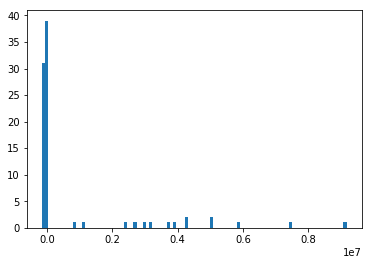

In [477]:
plt.hist(
    _df[(_df['TransactionDate'] >= '2017.08.01') &
        (_df['TransactionOwner'] == 'Екатерина')]['TransactionSum'].astype(
            int),
    bins=100)

In [467]:
_df[(_df['TransactionDate'] >= '2017.08.01') &
    (_df['TransactionOwner'] == 'Алексей')]['TransactionSum'].astype(
        int).sum()

70351912

In [468]:
_df[(_df['TransactionDate'] >= '2017.08.01') &
    (_df['TransactionOwner'] == 'Екатерина')]['TransactionSum'].astype(
        int).sum()

57931774

In [488]:
import collections

In [502]:
_df = pd.DataFrame(cards_info[7267061812381166]['transactions'])

In [503]:
collections.Counter(_df[_df['TransactionOwner'] == 'Екатерина']['TransactionPlace'])

Counter({'АЗС': 83,
         'Покупка в супермаркете': 181,
         'Покупка зарубщица': 66,
         'Покупка канонада': 67,
         'Покупка мензурка': 73,
         'Покупка народничество': 85,
         'Покупка нивх': 70,
         'Покупка полировщик': 76,
         'Покупка раунд': 74,
         'Покупка сглаживание': 83,
         'Пополнение': 300,
         'Снятие наличных': 442})

In [497]:
cards_info[9731875055002762]['owners']

['Анна', 'Алексей']

In [509]:
users = {}

for card in card_ids:
    real_user_name = [
        "{}_{}".format(card, i) for i in cards_info[card]['owners']
    ]
    for i in real_user_name:
        print(i)
        _df = pd.DataFrame(cards_info[card]['transactions'])
        users[i] = collections.Counter(_df[_df['TransactionOwner'] == i.split(
            '_')[-1]]['TransactionPlace'])
        print(users[i])

9731875055002762_Екатерина
Counter({'Снятие наличных': 406, 'Пополнение': 300, 'Покупка в супермаркете': 182, 'АЗС': 86, 'Покупка осиливание': 69, 'Покупка подрезание': 48, 'Покупка виртуальность': 44, 'Покупка пожатие': 43, 'Покупка трюк': 41, 'Покупка ипохондрик': 40, 'Покупка генерал-директор': 38, 'Покупка зерноочистка': 38, 'Покупка сусальность': 36, 'Покупка градус': 35, 'Покупка раскуривание': 34, 'Покупка портвейн': 34, 'Покупка взмах': 33, 'Покупка металл': 32, 'Покупка интерпретация': 31, 'Покупка мензурка': 30})
9731875055002762_Алексей
Counter({'Снятие наличных': 397, 'Пополнение': 300, 'Покупка в супермаркете': 189, 'АЗС': 89, 'Покупка интерпретация': 68, 'Покупка зарубщица': 61, 'Покупка сглаживание': 53, 'Покупка кощей': 40, 'Покупка трюк': 40, 'Покупка кинокамера': 39, 'Покупка разоритель': 37, 'Покупка сурепица': 36, 'Покупка генерал-директор': 36, 'Покупка звукоусиление': 36, 'Покупка раскуривание': 32, 'Покупка мензурка': 31, 'Покупка подтушёвывание': 27, 'Покупка пр

In [522]:
# сделать расстояние между пользователями
def user_distance(user1, user2):
    return np.sum(list((users[user1] - users[user2]).values()))

In [524]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)